Insurance Claims- Fraud Detection
Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 



# Insurance Claims

Import libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [68]:
df=pd.read_csv('insurance_claims.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


The data consists of categeorical and numerical data,our target variable fraud_reported consist of categeorical bivariate data.

In [69]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [70]:
df.shape

(1000, 40)

There are 1000 rows and 40 columns present in the data

In [71]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

There is float64 type of data in 2 columns,integer type of data in 17 columns and object type of data in 21 columns present

# EDA

In [73]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

The column _c39 contains all the rows with null values so,we can drop this column

In [74]:
df.drop(['_c39'],axis=1,inplace=True)

In [75]:
df.shape

(1000, 39)

<AxesSubplot:>

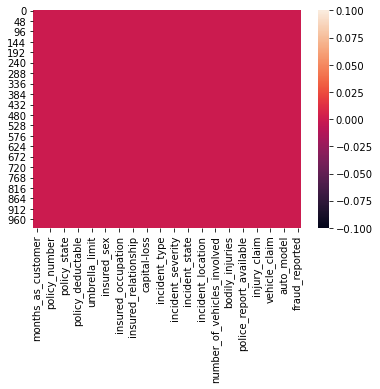

In [76]:
sns.heatmap(df.isnull())

In [77]:

df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


<AxesSubplot:>

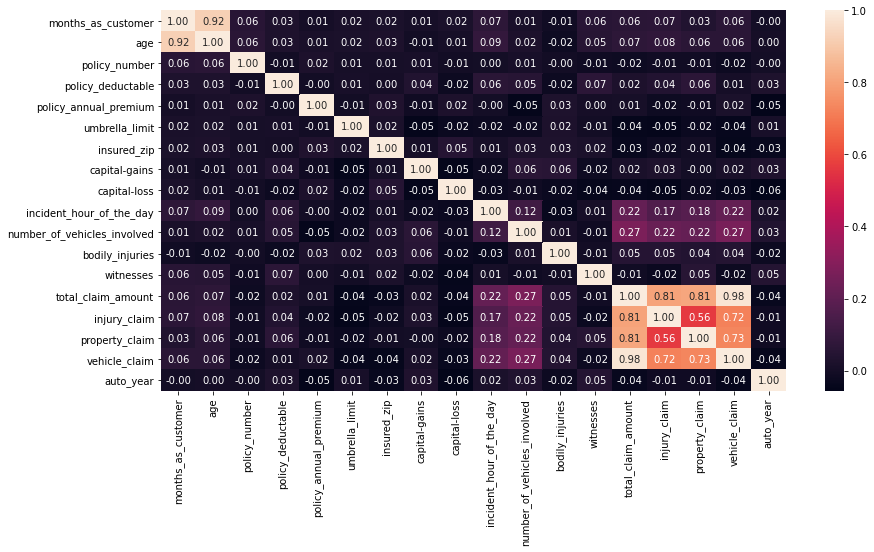

In [78]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True,fmt='.2f')

Here correlation is showing only numerical columns values how they are correlated. 
months_as_customer is 92% correlated with age,age is 92% correlated with months_as_customer,
'total_claim_amount' is 98% correlated with vehicle_claim
'total_claim_amount' is 81% correlated with property_claim and injury_claim
'injury_claim' is 72% correlated with vehicle_claim
'injury_claim' is 56% correlated with property_claim
'property_claim' is 73% correlated with vehicle_claim
'number_of_vehicles_involved' is 27% correlated with 'total_claim_amount'  

In [79]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


# DataVisualization

Text(0.5, 1.0, 'Fraud_reported')

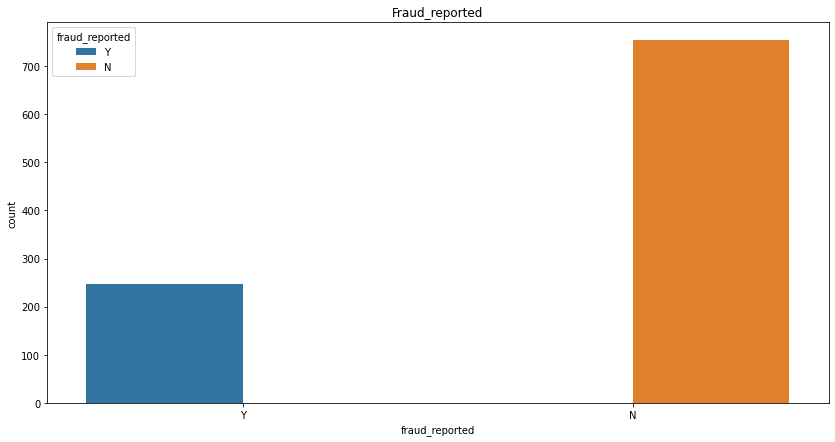

In [80]:
plt.figure(figsize=(14,7))
sns.countplot(x='fraud_reported',data=df,hue='fraud_reported')
df['fraud_reported'].value_counts()
plt.title('Fraud_reported')

There are total fraud report of 247

<AxesSubplot:xlabel='incident_state'>

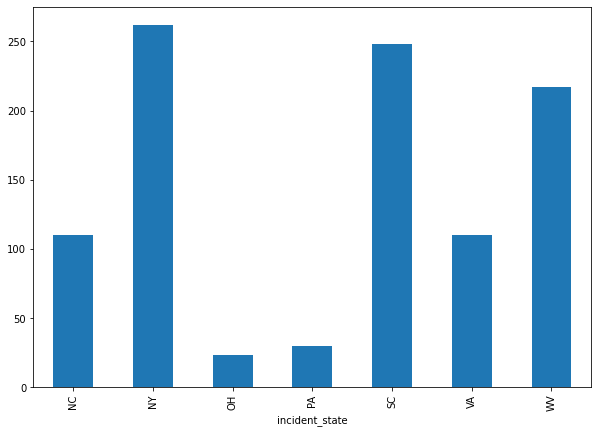

In [81]:
plt.figure(figsize=(10,7))
df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)

In [82]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64

Text(0.5, 1.0, 'Incident_Date vs Total_claim_amount')

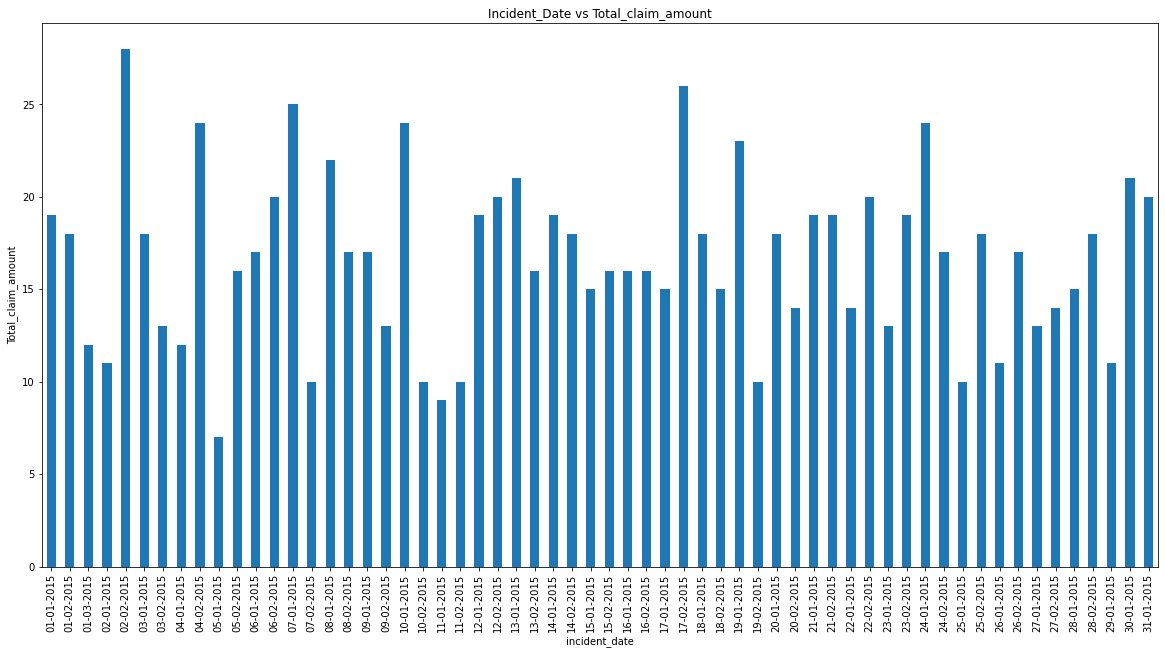

In [83]:
plt.figure(figsize=(20,10))
df.groupby('incident_date').total_claim_amount.count().plot.bar()
plt.ylabel('Total_claim_amount')
plt.title('Incident_Date vs Total_claim_amount')

The cases are in the month of january and february

Text(0.5, 1.0, 'Policy_state vs Fraud_reported')

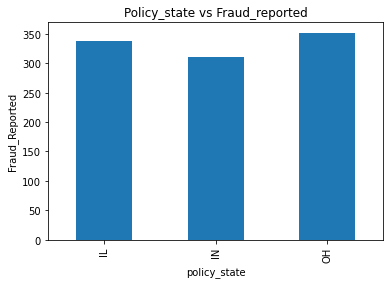

In [84]:
df.groupby('policy_state').fraud_reported.count().plot.bar()
plt.ylabel('Fraud_Reported')
plt.title('Policy_state vs Fraud_reported')

policy_state OH has highest values

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

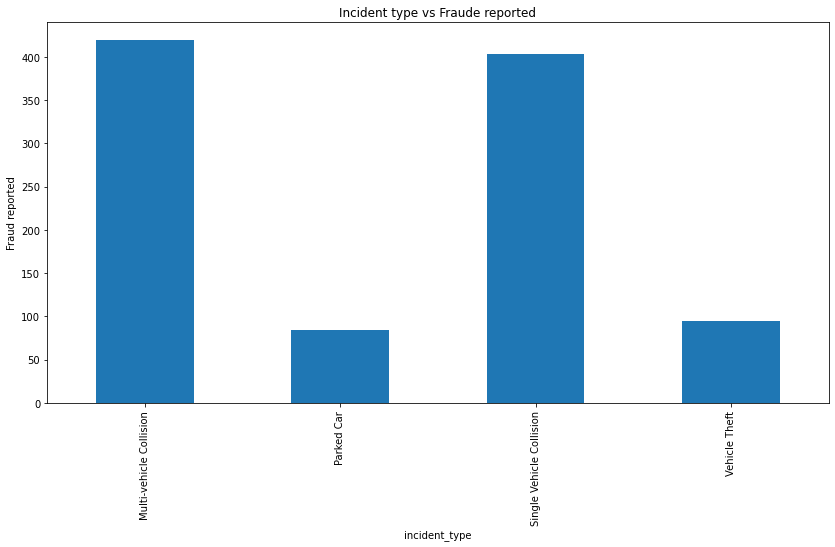

In [85]:
plt.figure(figsize=(14,7))
df.groupby('incident_type').fraud_reported.count().plot.bar()
plt.ylabel('Fraud reported')
plt.title('Incident type vs Fraude reported')
df['incident_type'].value_counts()


Multi_vehicle_collision has highest values 

<AxesSubplot:xlabel='incident_state', ylabel='count'>

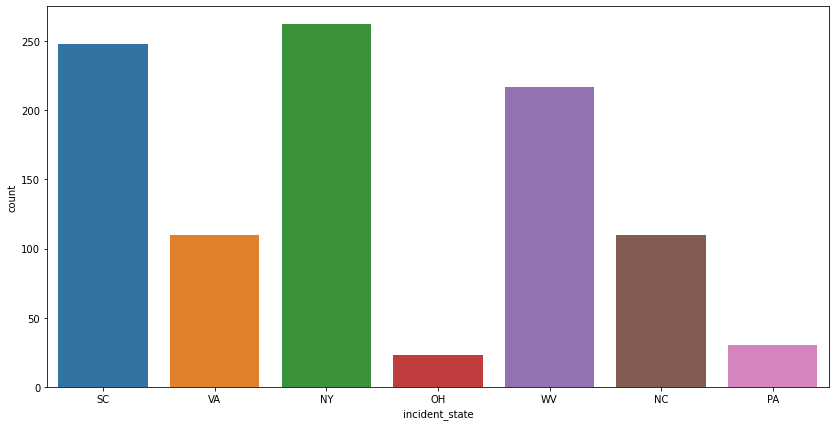

In [86]:
plt.figure(figsize=(14,7))
sns.countplot(df['incident_state'])

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

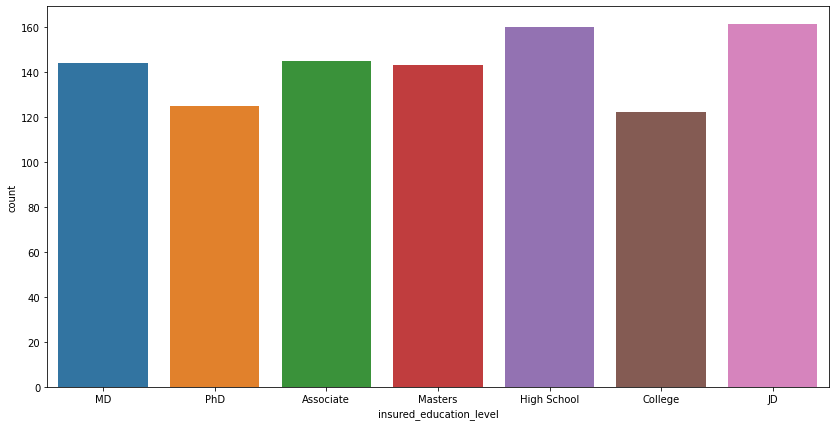

In [87]:
plt.figure(figsize=(14,7))
sns.countplot(df['insured_education_level'],data=df)
df['insured_education_level'].value_counts()

Most JD people,HighSchool members are insured

<AxesSubplot:>

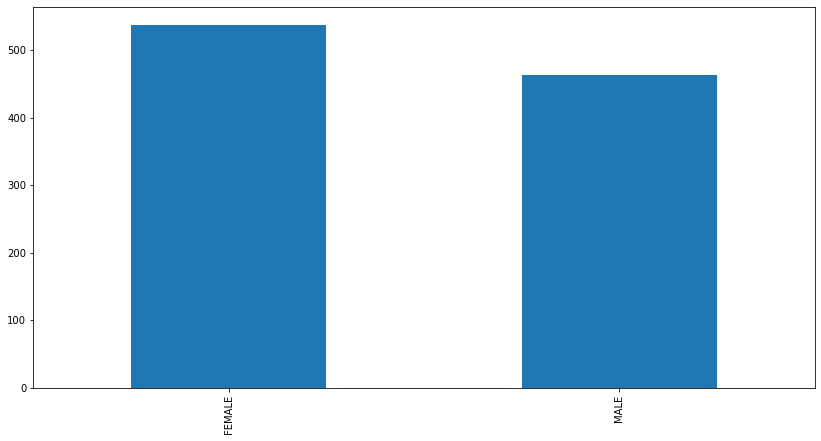

In [88]:
plt.figure(figsize=(14,7))
df['insured_sex'].value_counts().plot.bar()

Females are insured than males

<AxesSubplot:xlabel='age', ylabel='months_as_customer'>

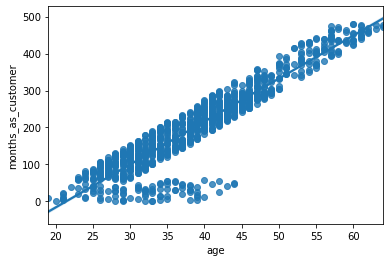

In [89]:
sns.regplot(x='age',y='months_as_customer',data=df)

<AxesSubplot:ylabel='insured_sex'>

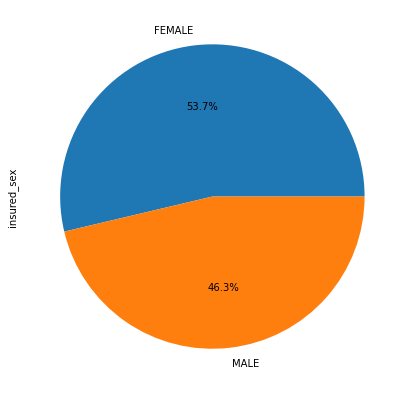

In [90]:
plt.figure(figsize=(14,7))
(df['insured_sex'].value_counts(normalize=True)).plot.pie(autopct='%.1f%%')

Insured_males are more than insured_female

<AxesSubplot:ylabel='insured_relationship'>

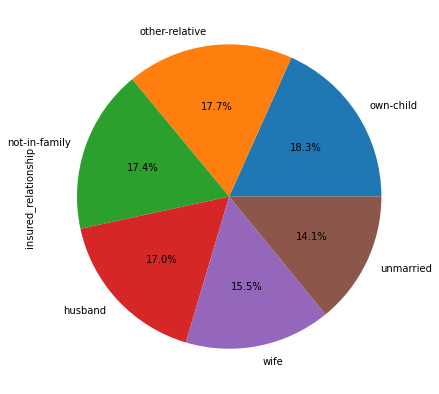

In [91]:

plt.figure(figsize=(14,7))
(df['insured_relationship'].value_counts(normalize=True)).plot.pie(autopct='%.1f%%')

<AxesSubplot:ylabel='incident_type'>

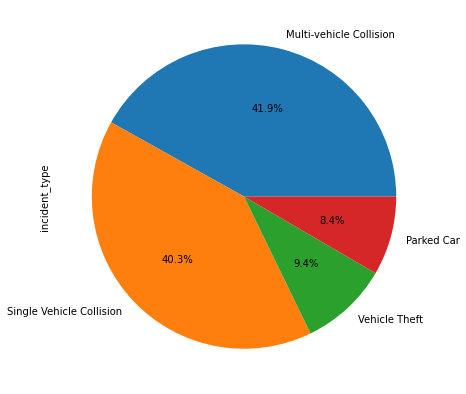

In [92]:

plt.figure(figsize=(14,7))
(df['incident_type'].value_counts(normalize=True)).plot.pie(autopct='%.1f%%')


incident type with Multi-vehicle collision is 41.9% and with single_vehicle_collision is 40%

<AxesSubplot:ylabel='authorities_contacted'>

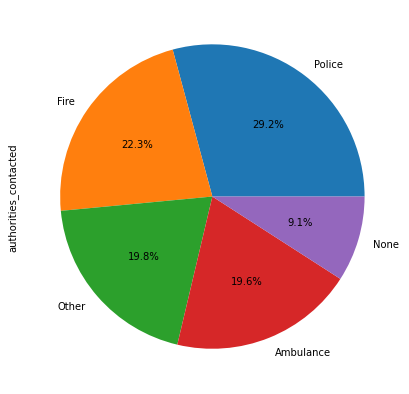

In [93]:
plt.figure(figsize=(14,7))
(df['authorities_contacted'].value_counts(normalize=True)).plot.pie(autopct='%.1f%%')

police are 29% involved,Fire is 22.3%,Ambulance is 19.5% involved

Dodge         80
Saab          80
Suburu        80
Nissan        78
Chevrolet     76
BMW           72
Ford          72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

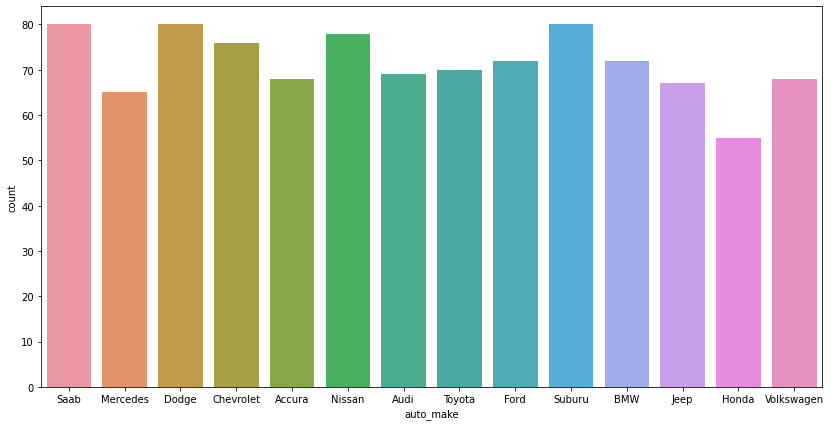

In [94]:
plt.figure(figsize=(14,7))
sns.countplot(x='auto_make',data=df)
df['auto_make'].value_counts()

Saab,Dodge,suburu,Nissan type of vehicles are more claimed

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

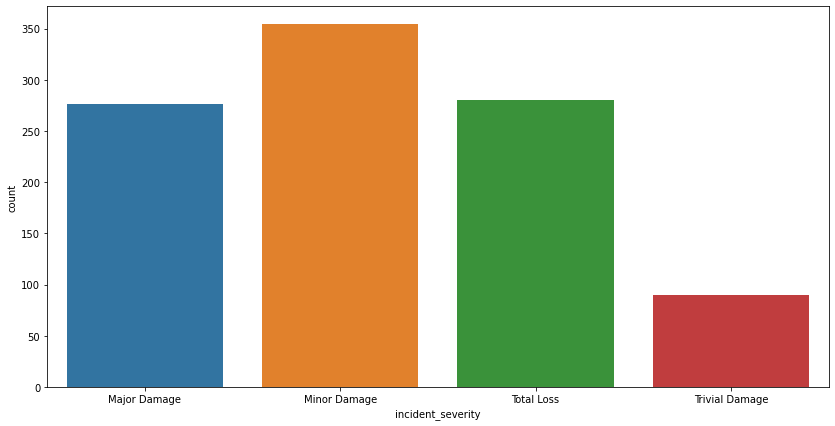

In [95]:
plt.figure(figsize=(14,7))
sns.countplot(x='incident_severity',data=df)
df['incident_severity'].value_counts()


more vehicles are minorly damaged

reading           64
paintball         57
exercise          57
bungie-jumping    56
golf              55
camping           55
movies            55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

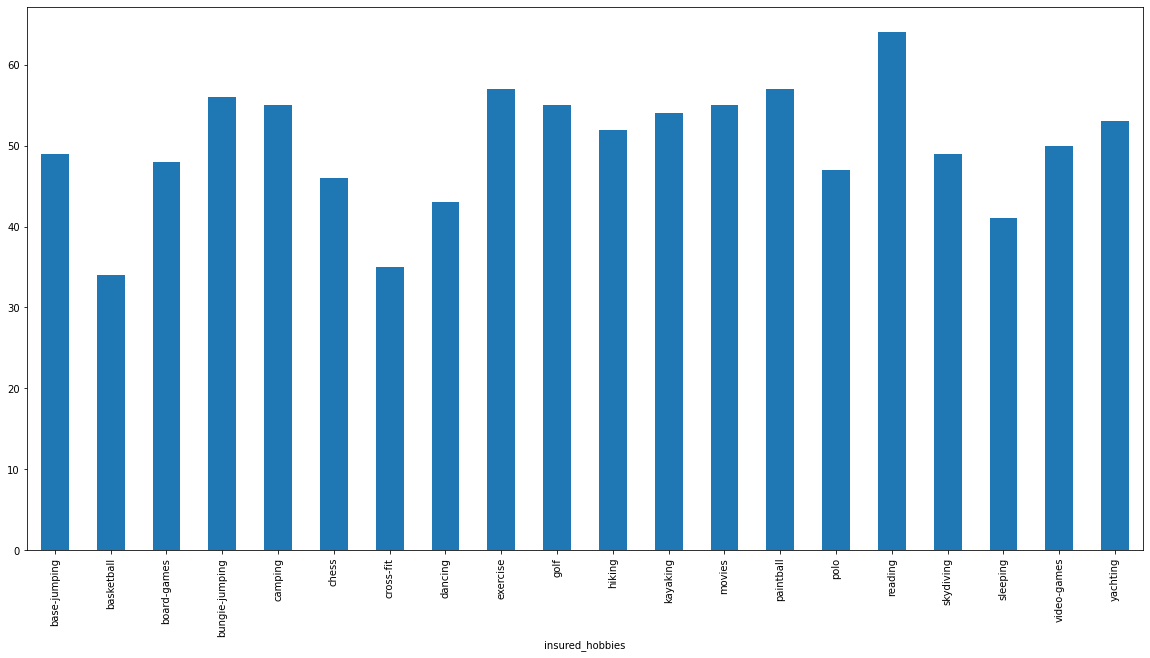

In [96]:
plt.figure(figsize=(20,10))
df.groupby('insured_hobbies').total_claim_amount.count().plot.bar()
df['insured_hobbies'].value_counts()

Insured_hobbies:reading is the highest for more members then paintball and excercise

In [97]:
#check auto_year valucounts
df['auto_year'].value_counts()

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

In [98]:
df['auto_year'].nunique()

21

There are 21 levels and the number of records for each of the levels are quite significant.considering the year of manufacturing of automobile indicates the age of the vehicle and may contain valuable information for insurance premium or fraud is concerned

In [99]:
df['vehicle_age']=2022-df['auto_year']
df['vehicle_age'].head(10)

0    18
1    15
2    15
3     8
4    13
5    19
6    10
7     7
8    10
9    26
Name: vehicle_age, dtype: int64

In [100]:
#categeorical variables
df.select_dtypes(include=['object']).columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [101]:

#dropping unimportant columns
df=df.drop(columns=['insured_zip','policy_bind_date','incident_date','incident_location','auto_year','incident_hour_of_the_day'])

In [102]:
#identifing ? 
unknowns={}
for i in list(df.columns):
    if(df[i]).dtype==object:
        j=np.sum(df[i]=="?")
        unknowns[i]=j
unknowns=pd.DataFrame.from_dict(unknowns,orient='index')
print(unknowns)
        

                           0
policy_state               0
policy_csl                 0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0
fraud_reported             0


collision_type,property_damage,police_report available contains many missing values.

In [103]:

df.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

<AxesSubplot:xlabel='collision_type'>

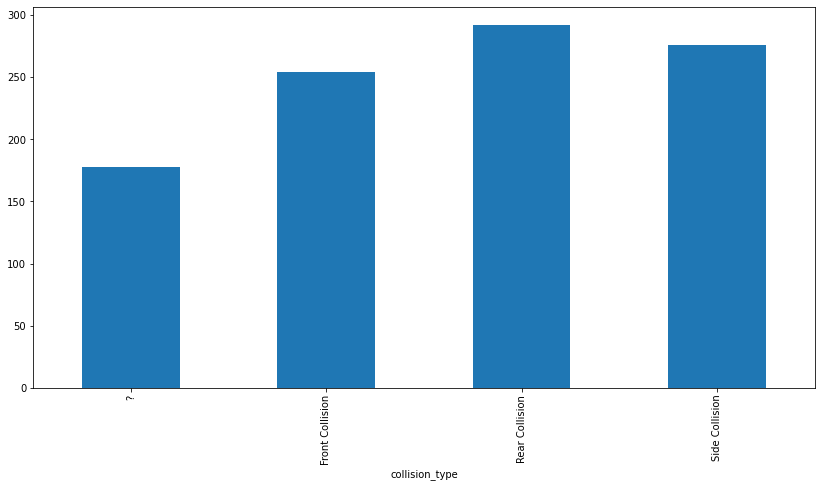

In [104]:
plt.figure(figsize=(14,7))
df.groupby('collision_type').police_report_available.count().plot.bar(ylim=0)


In [105]:
df.property_damage.value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

<AxesSubplot:xlabel='property_damage'>

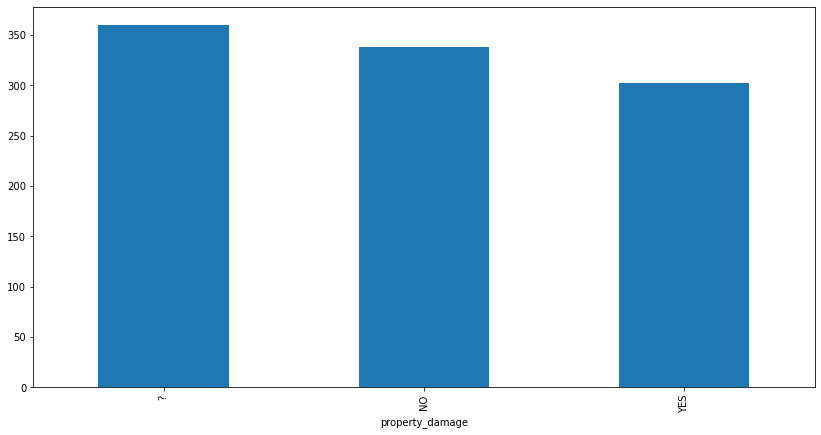

In [106]:
plt.figure(figsize=(14,7))
df.groupby('property_damage').police_report_available.count().plot.bar(ylim=0)

# Statistical Analysis

In [107]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,vehicle_age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,16.897000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,7.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,12.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,17.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,22.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,27.000000


describe() method tells statistical analysis of data it tells mean and standarddeviation of the dataset,minmum and maximum values,and quartiles of the data.

In [108]:
#checking skewness of the data
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
vehicle_age                    0.048289
dtype: float64

All the data is under the threshold value of skewness except umbrella_limit 

# Outliers Checking

months_as_customer                AxesSubplot(0.125,0.125;0.0407895x0.755)
age                            AxesSubplot(0.173947,0.125;0.0407895x0.755)
policy_number                  AxesSubplot(0.222895,0.125;0.0407895x0.755)
policy_deductable              AxesSubplot(0.271842,0.125;0.0407895x0.755)
policy_annual_premium          AxesSubplot(0.320789,0.125;0.0407895x0.755)
umbrella_limit                 AxesSubplot(0.369737,0.125;0.0407895x0.755)
capital-gains                  AxesSubplot(0.418684,0.125;0.0407895x0.755)
capital-loss                   AxesSubplot(0.467632,0.125;0.0407895x0.755)
number_of_vehicles_involved    AxesSubplot(0.516579,0.125;0.0407895x0.755)
bodily_injuries                AxesSubplot(0.565526,0.125;0.0407895x0.755)
witnesses                      AxesSubplot(0.614474,0.125;0.0407895x0.755)
total_claim_amount             AxesSubplot(0.663421,0.125;0.0407895x0.755)
injury_claim                   AxesSubplot(0.712368,0.125;0.0407895x0.755)
property_claim           

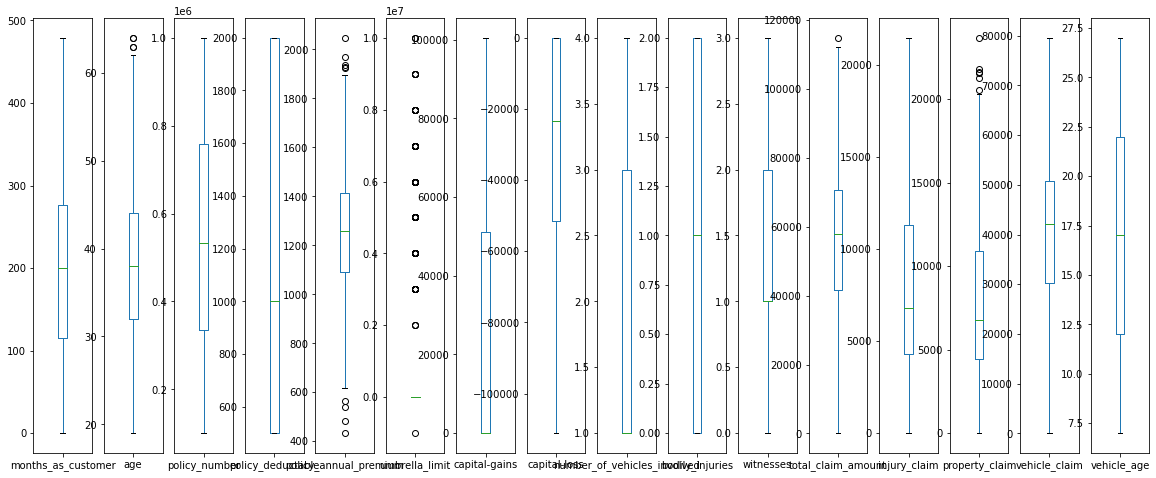

In [109]:
df.plot(kind='box',subplots=True,figsize=(20,8))

policy_annual_premium,umbrella_limit,property_claim consist of outliers we remove those in further sessions


# Encoding the DataFrame 

as our data consist of categeorical data convert into numerical using LabelEncoder

In [110]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age
0,328,48,521585,2,1,1000,1406.91,0,1,4,...,2,2,71610,6510,13020,52080,10,1,1,18
1,228,42,342868,1,1,2000,1197.22,5000000,1,4,...,0,0,5070,780,780,3510,8,12,1,15
2,134,29,687698,2,0,2000,1413.14,5000000,0,6,...,3,1,34650,7700,3850,23100,4,30,0,15
3,256,41,227811,0,1,2000,1415.74,6000000,0,6,...,2,1,63400,6340,6340,50720,3,34,1,8
4,228,44,367455,0,2,1000,1583.91,6000000,1,0,...,1,1,6500,1300,650,4550,0,31,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2,2,1000,1310.80,0,0,5,...,1,0,87200,17440,8720,61040,6,6,0,16
996,285,41,186934,0,0,1000,1436.79,0,0,6,...,3,0,108480,18080,18080,72320,13,28,0,7
997,130,34,918516,2,1,500,1383.49,3000000,0,5,...,3,2,67500,7500,7500,52500,11,19,0,26
998,458,62,533940,0,2,2000,1356.92,5000000,1,0,...,1,2,46980,5220,5220,36540,1,5,0,24


# Removing Outliers

In [111]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
        657, 700, 763, 807, 875, 922, 975], dtype=int32),
 array([ 7,  7,  7,  7,  7,  6,  6,  7,  7,  7,  7, 28,  7,  7,  7,  6, 14,
         7,  7,  7], dtype=int32))

In [112]:
df_new=df[(z<3).all(axis=1)]

In [113]:
df_new.head(5)

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age
0,328,48,521585,2,1,1000,1406.91,0,1,4,...,2,2,71610,6510,13020,52080,10,1,1,18
1,228,42,342868,1,1,2000,1197.22,5000000,1,4,...,0,0,5070,780,780,3510,8,12,1,15
2,134,29,687698,2,0,2000,1413.14,5000000,0,6,...,3,1,34650,7700,3850,23100,4,30,0,15
3,256,41,227811,0,1,2000,1415.74,6000000,0,6,...,2,1,63400,6340,6340,50720,3,34,1,8
4,228,44,367455,0,2,1000,1583.91,6000000,1,0,...,1,1,6500,1300,650,4550,0,31,0,13


In [114]:
print("OldDataFrame",df.shape)
print("newdataframe",df_new.shape)
print("Totaldroppedrows",df.shape[0]-df_new.shape[0])


OldDataFrame (1000, 34)
newdataframe (980, 34)
Totaldroppedrows 20


In [115]:
df_new.skew()

months_as_customer             0.362608
age                            0.475385
policy_number                  0.036283
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.194015
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
number_of_vehicles_involved    0.509725
property_damage                0.101196
bodily_injuries                0.003757
witnesses                      0.026211


## seperating the columns into features and target

In [116]:
x=df_new.drop(['fraud_reported'],axis=1)
y=df_new['fraud_reported']

# Transforming data to remove skewness

Here we are using power_transformation to remove skewness

In [117]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.04454111,  1.0023305 , -0.02347493, ...,  0.85481164,
        -1.80721231,  0.24193076],
       [ 0.29904549,  0.42717141, -0.74401221, ...,  0.41187331,
        -0.57848628, -0.25339846],
       [-0.51581942, -1.13601305,  0.58680474, ..., -0.56458381,
         0.9504262 , -0.25339846],
       ...,
       [-0.55427228, -0.47059792,  1.37172562, ...,  1.06823592,
         0.05320514,  1.44993064],
       [ 1.90408801,  2.12107486,  0.02357929, ..., -1.44793034,
        -1.29996796,  1.16064111],
       [ 1.89156317,  1.97656406,  0.10716503, ...,  0.41187331,
        -0.57848628, -0.25339846]])

In [118]:
pd.DataFrame(x).skew()

0    -0.133972
1    -0.002183
2    -0.161791
3    -0.150765
4    -0.096814
5     0.022179
6    -0.007258
7    -7.932397
8     0.139324
9    -0.187642
10   -0.238129
11   -0.248575
12   -0.160168
13    0.031294
14    0.088750
15   -0.095572
16   -0.204055
17   -0.079569
18   -0.223816
19   -0.256064
20   -0.181833
21    0.372833
22   -0.093063
23   -0.133824
24   -0.151669
25   -0.117961
26   -0.508540
27   -0.416732
28   -0.357397
29   -0.521805
30   -0.229846
31   -0.276099
32   -0.094757
dtype: float64

# Scaling the data Using StandardScaler

In [119]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.04454111,  1.0023305 , -0.02347493, ...,  0.85481164,
        -1.80721231,  0.24193076],
       [ 0.29904549,  0.42717141, -0.74401221, ...,  0.41187331,
        -0.57848628, -0.25339846],
       [-0.51581942, -1.13601305,  0.58680474, ..., -0.56458381,
         0.9504262 , -0.25339846],
       ...,
       [-0.55427228, -0.47059792,  1.37172562, ...,  1.06823592,
         0.05320514,  1.44993064],
       [ 1.90408801,  2.12107486,  0.02357929, ..., -1.44793034,
        -1.29996796,  1.16064111],
       [ 1.89156317,  1.97656406,  0.10716503, ...,  0.41187331,
        -0.57848628, -0.25339846]])

# Checking VIF

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(df_new.values,i) for i in range(df_new.shape[1])]
vif["features"]=df_new.columns

In [121]:
vif

,vif,features
0,23.296802,months_as_customer
1,96.249772,age
2,5.593213,policy_number
3,2.563171,policy_state
4,2.445970,policy_csl
5,4.536147,policy_deductable
6,25.464518,policy_annual_premium
7,1.260279,umbrella_limit
8,1.915378,insured_sex
9,3.376793,insured_education_level


In [122]:

#finding the variables based on the cut-off value of VIF 10

In [123]:
f_data=vif[vif.vif>10].reset_index(drop=True)
f_data

,vif,features
0,23.296802,months_as_customer
1,96.249772,age
2,25.464518,policy_annual_premium
3,17.257606,number_of_vehicles_involved
4,inf,total_claim_amount
5,inf,injury_claim
6,inf,property_claim
7,inf,vehicle_claim


# ModelBuilding


Here our dataset is of Binary Classification so we use LogisticRegression

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [125]:
lr=LogisticRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At Random state {i} the training accuracy is:",accuracy_score(y_train,pred_train))
    print(f"At Random state {i} the testing accuracy is:",accuracy_score(y_test,pred_test))
    print("\n")

At Random state 0 the training accuracy is: 0.8035714285714286
At Random state 0 the testing accuracy is: 0.7959183673469388


At Random state 1 the training accuracy is: 0.8073979591836735
At Random state 1 the testing accuracy is: 0.7959183673469388


At Random state 2 the training accuracy is: 0.8150510204081632
At Random state 2 the testing accuracy is: 0.7295918367346939


At Random state 3 the training accuracy is: 0.8061224489795918
At Random state 3 the testing accuracy is: 0.8214285714285714


At Random state 4 the training accuracy is: 0.8137755102040817
At Random state 4 the testing accuracy is: 0.7959183673469388


At Random state 5 the training accuracy is: 0.8163265306122449
At Random state 5 the testing accuracy is: 0.7806122448979592


At Random state 6 the training accuracy is: 0.8086734693877551
At Random state 6 the testing accuracy is: 0.8163265306122449


At Random state 7 the training accuracy is: 0.8086734693877551
At Random state 7 the testing accuracy is: 0.801

At Random state 66 the testing accuracy is: 0.7704081632653061


At Random state 67 the training accuracy is: 0.8150510204081632
At Random state 67 the testing accuracy is: 0.7857142857142857


At Random state 68 the training accuracy is: 0.8061224489795918
At Random state 68 the testing accuracy is: 0.8214285714285714


At Random state 69 the training accuracy is: 0.8086734693877551
At Random state 69 the testing accuracy is: 0.8214285714285714


At Random state 70 the training accuracy is: 0.8112244897959183
At Random state 70 the testing accuracy is: 0.7653061224489796


At Random state 71 the training accuracy is: 0.8201530612244898
At Random state 71 the testing accuracy is: 0.7602040816326531


At Random state 72 the training accuracy is: 0.8086734693877551
At Random state 72 the testing accuracy is: 0.7806122448979592


At Random state 73 the training accuracy is: 0.7997448979591837
At Random state 73 the testing accuracy is: 0.7908163265306123


At Random state 74 the training 

At Random state 136 the training accuracy is: 0.8214285714285714
At Random state 136 the testing accuracy is: 0.7448979591836735


At Random state 137 the training accuracy is: 0.8227040816326531
At Random state 137 the testing accuracy is: 0.7755102040816326


At Random state 138 the training accuracy is: 0.8137755102040817
At Random state 138 the testing accuracy is: 0.7857142857142857


At Random state 139 the training accuracy is: 0.8188775510204082
At Random state 139 the testing accuracy is: 0.7602040816326531


At Random state 140 the training accuracy is: 0.8035714285714286
At Random state 140 the testing accuracy is: 0.7908163265306123


At Random state 141 the training accuracy is: 0.8150510204081632
At Random state 141 the testing accuracy is: 0.7959183673469388


At Random state 142 the training accuracy is: 0.8086734693877551
At Random state 142 the testing accuracy is: 0.7857142857142857


At Random state 143 the training accuracy is: 0.8112244897959183
At Random state 14

At Random state 199 the training accuracy is: 0.8137755102040817
At Random state 199 the testing accuracy is: 0.7908163265306123


At Random state 200 the training accuracy is: 0.8125
At Random state 200 the testing accuracy is: 0.7857142857142857


At Random state 201 the training accuracy is: 0.8252551020408163
At Random state 201 the testing accuracy is: 0.7244897959183674


At Random state 202 the training accuracy is: 0.8022959183673469
At Random state 202 the testing accuracy is: 0.8163265306122449


At Random state 203 the training accuracy is: 0.8086734693877551
At Random state 203 the testing accuracy is: 0.7397959183673469


At Random state 204 the training accuracy is: 0.8061224489795918
At Random state 204 the testing accuracy is: 0.7704081632653061


At Random state 205 the training accuracy is: 0.8227040816326531
At Random state 205 the testing accuracy is: 0.7448979591836735


At Random state 206 the training accuracy is: 0.8125
At Random state 206 the testing accuracy i

At Random state 263 the training accuracy is: 0.8035714285714286
At Random state 263 the testing accuracy is: 0.8010204081632653


At Random state 264 the training accuracy is: 0.8239795918367347
At Random state 264 the testing accuracy is: 0.7040816326530612


At Random state 265 the training accuracy is: 0.8201530612244898
At Random state 265 the testing accuracy is: 0.75


At Random state 266 the training accuracy is: 0.8150510204081632
At Random state 266 the testing accuracy is: 0.7755102040816326


At Random state 267 the training accuracy is: 0.8227040816326531
At Random state 267 the testing accuracy is: 0.7448979591836735


At Random state 268 the training accuracy is: 0.8137755102040817
At Random state 268 the testing accuracy is: 0.7551020408163265


At Random state 269 the training accuracy is: 0.8061224489795918
At Random state 269 the testing accuracy is: 0.8316326530612245


At Random state 270 the training accuracy is: 0.8099489795918368
At Random state 270 the testing 

At Random state 326 the training accuracy is: 0.8188775510204082
At Random state 326 the testing accuracy is: 0.7755102040816326


At Random state 327 the training accuracy is: 0.8086734693877551
At Random state 327 the testing accuracy is: 0.8010204081632653


At Random state 328 the training accuracy is: 0.8214285714285714
At Random state 328 the testing accuracy is: 0.7397959183673469


At Random state 329 the training accuracy is: 0.8035714285714286
At Random state 329 the testing accuracy is: 0.8112244897959183


At Random state 330 the training accuracy is: 0.8099489795918368
At Random state 330 the testing accuracy is: 0.8061224489795918


At Random state 331 the training accuracy is: 0.8239795918367347
At Random state 331 the testing accuracy is: 0.7602040816326531


At Random state 332 the training accuracy is: 0.8290816326530612
At Random state 332 the testing accuracy is: 0.7397959183673469


At Random state 333 the training accuracy is: 0.8035714285714286
At Random state 33

At Random state 392 the training accuracy is: 0.8252551020408163
At Random state 392 the testing accuracy is: 0.7653061224489796


At Random state 393 the training accuracy is: 0.8086734693877551
At Random state 393 the testing accuracy is: 0.7806122448979592


At Random state 394 the training accuracy is: 0.8290816326530612
At Random state 394 the testing accuracy is: 0.7551020408163265


At Random state 395 the training accuracy is: 0.8137755102040817
At Random state 395 the testing accuracy is: 0.7551020408163265


At Random state 396 the training accuracy is: 0.8061224489795918
At Random state 396 the testing accuracy is: 0.7857142857142857


At Random state 397 the training accuracy is: 0.8163265306122449
At Random state 397 the testing accuracy is: 0.75


At Random state 398 the training accuracy is: 0.8022959183673469
At Random state 398 the testing accuracy is: 0.7908163265306123


At Random state 399 the training accuracy is: 0.8010204081632653
At Random state 399 the testing 

At Random state 459 the testing accuracy is: 0.8163265306122449


At Random state 460 the training accuracy is: 0.8214285714285714
At Random state 460 the testing accuracy is: 0.7704081632653061


At Random state 461 the training accuracy is: 0.8176020408163265
At Random state 461 the testing accuracy is: 0.75


At Random state 462 the training accuracy is: 0.8137755102040817
At Random state 462 the testing accuracy is: 0.7806122448979592


At Random state 463 the training accuracy is: 0.8010204081632653
At Random state 463 the testing accuracy is: 0.7857142857142857


At Random state 464 the training accuracy is: 0.8163265306122449
At Random state 464 the testing accuracy is: 0.7346938775510204


At Random state 465 the training accuracy is: 0.8035714285714286
At Random state 465 the testing accuracy is: 0.8112244897959183


At Random state 466 the training accuracy is: 0.8010204081632653
At Random state 466 the testing accuracy is: 0.8061224489795918


At Random state 467 the trainin

At Random state 525 the training accuracy is: 0.8227040816326531
At Random state 525 the testing accuracy is: 0.7602040816326531


At Random state 526 the training accuracy is: 0.7920918367346939
At Random state 526 the testing accuracy is: 0.8214285714285714


At Random state 527 the training accuracy is: 0.8137755102040817
At Random state 527 the testing accuracy is: 0.7806122448979592


At Random state 528 the training accuracy is: 0.8073979591836735
At Random state 528 the testing accuracy is: 0.7653061224489796


At Random state 529 the training accuracy is: 0.8188775510204082
At Random state 529 the testing accuracy is: 0.7908163265306123


At Random state 530 the training accuracy is: 0.8010204081632653
At Random state 530 the testing accuracy is: 0.8010204081632653


At Random state 531 the training accuracy is: 0.8112244897959183
At Random state 531 the testing accuracy is: 0.7908163265306123


At Random state 532 the training accuracy is: 0.7959183673469388
At Random state 53

At Random state 595 the training accuracy is: 0.8214285714285714
At Random state 595 the testing accuracy is: 0.7091836734693877


At Random state 596 the training accuracy is: 0.8163265306122449
At Random state 596 the testing accuracy is: 0.7704081632653061


At Random state 597 the training accuracy is: 0.8176020408163265
At Random state 597 the testing accuracy is: 0.7755102040816326


At Random state 598 the training accuracy is: 0.8239795918367347
At Random state 598 the testing accuracy is: 0.7653061224489796


At Random state 599 the training accuracy is: 0.8163265306122449
At Random state 599 the testing accuracy is: 0.7959183673469388


At Random state 600 the training accuracy is: 0.8125
At Random state 600 the testing accuracy is: 0.7908163265306123


At Random state 601 the training accuracy is: 0.8010204081632653
At Random state 601 the testing accuracy is: 0.7806122448979592


At Random state 602 the training accuracy is: 0.8086734693877551
At Random state 602 the testin

At Random state 659 the training accuracy is: 0.826530612244898
At Random state 659 the testing accuracy is: 0.7295918367346939


At Random state 660 the training accuracy is: 0.8035714285714286
At Random state 660 the testing accuracy is: 0.7959183673469388


At Random state 661 the training accuracy is: 0.8163265306122449
At Random state 661 the testing accuracy is: 0.8010204081632653


At Random state 662 the training accuracy is: 0.8022959183673469
At Random state 662 the testing accuracy is: 0.8214285714285714


At Random state 663 the training accuracy is: 0.8061224489795918
At Random state 663 the testing accuracy is: 0.7704081632653061


At Random state 664 the training accuracy is: 0.7959183673469388
At Random state 664 the testing accuracy is: 0.7908163265306123


At Random state 665 the training accuracy is: 0.8073979591836735
At Random state 665 the testing accuracy is: 0.7908163265306123


At Random state 666 the training accuracy is: 0.8022959183673469
At Random state 666

At Random state 728 the training accuracy is: 0.8086734693877551
At Random state 728 the testing accuracy is: 0.7857142857142857


At Random state 729 the training accuracy is: 0.8125
At Random state 729 the testing accuracy is: 0.7551020408163265


At Random state 730 the training accuracy is: 0.8188775510204082
At Random state 730 the testing accuracy is: 0.7857142857142857


At Random state 731 the training accuracy is: 0.8010204081632653
At Random state 731 the testing accuracy is: 0.7602040816326531


At Random state 732 the training accuracy is: 0.8112244897959183
At Random state 732 the testing accuracy is: 0.7755102040816326


At Random state 733 the training accuracy is: 0.8073979591836735
At Random state 733 the testing accuracy is: 0.7806122448979592


At Random state 734 the training accuracy is: 0.8188775510204082
At Random state 734 the testing accuracy is: 0.7704081632653061


At Random state 735 the training accuracy is: 0.8125
At Random state 735 the testing accuracy i

At Random state 792 the testing accuracy is: 0.7602040816326531


At Random state 793 the training accuracy is: 0.8227040816326531
At Random state 793 the testing accuracy is: 0.7806122448979592


At Random state 794 the training accuracy is: 0.8150510204081632
At Random state 794 the testing accuracy is: 0.7295918367346939


At Random state 795 the training accuracy is: 0.8150510204081632
At Random state 795 the testing accuracy is: 0.7755102040816326


At Random state 796 the training accuracy is: 0.8035714285714286
At Random state 796 the testing accuracy is: 0.826530612244898


At Random state 797 the training accuracy is: 0.8061224489795918
At Random state 797 the testing accuracy is: 0.8163265306122449


At Random state 798 the training accuracy is: 0.8201530612244898
At Random state 798 the testing accuracy is: 0.7755102040816326


At Random state 799 the training accuracy is: 0.8035714285714286
At Random state 799 the testing accuracy is: 0.7806122448979592


At Random state 80

At Random state 861 the training accuracy is: 0.8125
At Random state 861 the testing accuracy is: 0.7551020408163265


At Random state 862 the training accuracy is: 0.8176020408163265
At Random state 862 the testing accuracy is: 0.7704081632653061


At Random state 863 the training accuracy is: 0.8150510204081632
At Random state 863 the testing accuracy is: 0.8163265306122449


At Random state 864 the training accuracy is: 0.8278061224489796
At Random state 864 the testing accuracy is: 0.7397959183673469


At Random state 865 the training accuracy is: 0.8010204081632653
At Random state 865 the testing accuracy is: 0.8010204081632653


At Random state 866 the training accuracy is: 0.8086734693877551
At Random state 866 the testing accuracy is: 0.8061224489795918


At Random state 867 the training accuracy is: 0.8201530612244898
At Random state 867 the testing accuracy is: 0.7755102040816326


At Random state 868 the training accuracy is: 0.8035714285714286
At Random state 868 the testin

At Random state 924 the training accuracy is: 0.8061224489795918
At Random state 924 the testing accuracy is: 0.7857142857142857


At Random state 925 the training accuracy is: 0.8150510204081632
At Random state 925 the testing accuracy is: 0.7551020408163265


At Random state 926 the training accuracy is: 0.8150510204081632
At Random state 926 the testing accuracy is: 0.8214285714285714


At Random state 927 the training accuracy is: 0.8214285714285714
At Random state 927 the testing accuracy is: 0.75


At Random state 928 the training accuracy is: 0.8061224489795918
At Random state 928 the testing accuracy is: 0.7806122448979592


At Random state 929 the training accuracy is: 0.8176020408163265
At Random state 929 the testing accuracy is: 0.7653061224489796


At Random state 930 the training accuracy is: 0.8061224489795918
At Random state 930 the testing accuracy is: 0.7908163265306123


At Random state 931 the training accuracy is: 0.8125
At Random state 931 the testing accuracy is:

At Random state 993 the training accuracy is: 0.8061224489795918
At Random state 993 the testing accuracy is: 0.7653061224489796


At Random state 994 the training accuracy is: 0.8099489795918368
At Random state 994 the testing accuracy is: 0.8112244897959183


At Random state 995 the training accuracy is: 0.8188775510204082
At Random state 995 the testing accuracy is: 0.7551020408163265


At Random state 996 the training accuracy is: 0.8086734693877551
At Random state 996 the testing accuracy is: 0.7959183673469388


At Random state 997 the training accuracy is: 0.8112244897959183
At Random state 997 the testing accuracy is: 0.7653061224489796


At Random state 998 the training accuracy is: 0.8150510204081632
At Random state 998 the testing accuracy is: 0.8010204081632653


At Random state 999 the training accuracy is: 0.8163265306122449
At Random state 999 the testing accuracy is: 0.7653061224489796




At Randomstate 40 The training accuracy is 0.799
At Randomstate 40 The testing accuracy is 0.790

# DecisionTreeClassifier

In [126]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Accuracy_score is:",accuracy_score(y_test,preddtc))
print("cross_validation_score is:",cross_val_score(dtc,x,y,cv=5).mean())
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))


Accuracy_score is: 0.7755102040816326
cross_validation_score is: 0.763265306122449
[[120  24]
 [ 20  32]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       144
           1       0.57      0.62      0.59        52

    accuracy                           0.78       196
   macro avg       0.71      0.72      0.72       196
weighted avg       0.78      0.78      0.78       196



# KNN

In [127]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print("Accuracy is",accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))
print("cross_val_score is",cross_val_score(knn,x,y,cv=5).mean())

Accuracy is 0.7142857142857143
[[129  15]
 [ 41  11]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       144
           1       0.42      0.21      0.28        52

    accuracy                           0.71       196
   macro avg       0.59      0.55      0.55       196
weighted avg       0.67      0.71      0.68       196

cross_val_score is 0.7377551020408163


# SVC

In [128]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy_score is:",accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))
print("cross_val_score is:",cross_val_score(svc,x,y,cv=5).mean())

Accuracy_score is: 0.7346938775510204
[[141   3]
 [ 49   3]]
              precision    recall  f1-score   support

           0       0.74      0.98      0.84       144
           1       0.50      0.06      0.10        52

    accuracy                           0.73       196
   macro avg       0.62      0.52      0.47       196
weighted avg       0.68      0.73      0.65       196

cross_val_score is: 0.7479591836734695


# RandomForestClassifier

In [129]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print("Accuracy is",accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))
print("cross_val_score is",cross_val_score(rfc,x,y,cv=5).mean())

Accuracy is 0.7653061224489796
[[137   7]
 [ 39  13]]
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       144
           1       0.65      0.25      0.36        52

    accuracy                           0.77       196
   macro avg       0.71      0.60      0.61       196
weighted avg       0.74      0.77      0.72       196

cross_val_score is 0.7612244897959183



# GradientBoostingClassifier

In [130]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict(x_test)
print("Accuracy is",accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))
print("cross_val_score is",cross_val_score(gbc,x,y,cv=5).mean())

Accuracy is 0.8010204081632653
[[126  18]
 [ 21  31]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       144
           1       0.63      0.60      0.61        52

    accuracy                           0.80       196
   macro avg       0.74      0.74      0.74       196
weighted avg       0.80      0.80      0.80       196

cross_val_score is 0.8183673469387756


# HyperParametr Tuning

In [131]:
from sklearn.model_selection import GridSearchCV
gbc=GradientBoostingClassifier()
param_grid={"criterion":['friedman_mse','squared_error','mse'],
           "n_estimators":[100,300],
           "learning_rate":[1.0,3.0,5.0],
           "max_depth":[3,10],
           "max_features":['auto','sqrt','log2']
           }

gb=GridSearchCV(gbc,param_grid=param_grid,cv=5)
gb.fit(x_train,y_train)
gbc_best=gb.best_params_
gbc_best

{'criterion': 'squared_error',
 'learning_rate': 1.0,
 'max_depth': 3,
 'max_features': 'auto',
 'n_estimators': 300}

In [132]:
g=GradientBoostingClassifier(criterion='friedman_mse',learning_rate=1.0,max_depth=3,max_features='auto',n_estimators=300)
g.fit(x,y)
g.score(x_train,y_train)
pred_decision=g.predict(x_test)

gs=accuracy_score(y_test,pred_decision)
print('accuracy_score',gs*100)
gsscore=cross_val_score(g,x,y,cv=5)
gc=gsscore.mean()
print("cross_val_score:",gc*100)

accuracy_score 100.0
cross_val_score: 81.53061224489797


# AUC ROC curve

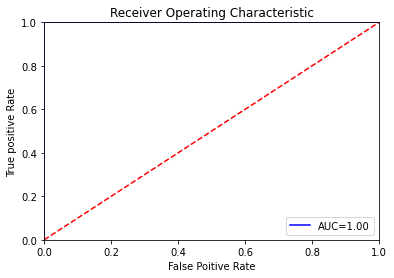

In [133]:
#AUC ROC curve
from sklearn import metrics
probs=g.predict_proba(x_test)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,preds)
roc_auc=metrics.auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True positive Rate')
plt.xlabel('False Poitive Rate')
plt.show()

In [134]:
#splitting the data to Test
x=df_new.drop(['fraud_reported'],axis=1)
y=df_new['fraud_reported']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40)

In [135]:
#predict the values
g=GradientBoostingClassifier()
g.fit(x_train,y_train)
pred=g.predict(x_test)
print("Predicted ",pred)
print("actual",y_test)

Predicted  [1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0]
actual 474    1
201    0
374    0
73     0
43     0
      ..
842    0
508    0
142    0
84     1
193    0
Name: fraud_reported, Length: 196, dtype: int32


In [136]:
df=pd.DataFrame({"Actual":y_test,"Predicted":pred})
df

,Actual,Predicted
474,1,1
201,0,0
374,0,1
73,0,0
43,0,0
...,...,...
842,0,0
508,0,0
142,0,0
84,1,1


Conclusion: we are getting 100% accuracy_score in GradientBoostingClassifier and a cross_validationscore as 81% so we accept this model

# Saving the Model

In [137]:
import pickle
file_name='RainTomorrow.pkl'
pickle.dump(g,open(file_name,'wb'))